### Sendy CASELLA_Final Project - M2 IREN

## 1. Preprocessing

In [56]:
# 1. load the dataset
from sklearn import tree,ensemble,datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("HISP.csv")
print("Missing values =", df.isnull().sum().sum())

df.head(10)

Missing values = 0


,locality_identifier,household_identifier,treatment_locality,promotion_locality,eligible,enrolled,enrolled_rp,poverty_index,round,health_expenditures,...,educ_hh,educ_sp,female_hh,indigenous,hhsize,dirtfloor,bathroom,land,hospital_distance,enrolled_num
0,26,5,Treatment,Promotion,Eligible,Enrolled,1,55.950542,Before,15.185455,...,0.0,6.0,0,0,4,1,0,1,124.819966,1
1,26,5,Treatment,Promotion,Eligible,Enrolled,1,55.950542,After,19.580902,...,0.0,6.0,0,0,4,1,0,1,124.819966,1
2,26,11,Treatment,Promotion,Eligible,Enrolled,0,46.058731,Before,13.076257,...,4.0,0.0,0,0,6,1,0,2,124.819966,1
3,26,11,Treatment,Promotion,Eligible,Enrolled,0,46.058731,After,2.398854,...,4.0,0.0,0,0,6,1,0,2,124.819966,1
4,26,13,Treatment,Promotion,Eligible,Enrolled,0,54.095825,After,0.000000,...,0.0,0.0,0,0,6,1,0,4,124.819966,1
5,26,13,Treatment,Promotion,Eligible,Enrolled,0,54.095825,Before,15.286353,...,0.0,0.0,0,0,6,1,0,4,124.819966,1
6,26,16,Treatment,Promotion,Eligible,Enrolled,1,56.903400,After,20.026909,...,3.0,0.0,0,0,7,1,0,2,124.819966,1
7,26,16,Treatment,Promotion,Eligible,Enrolled,1,56.903400,Before,11.311761,...,3.0,0.0,0,0,7,1,0,2,124.819966,1
8,26,21,Treatment,Promotion,Eligible,Enrolled,1,46.908810,Before,11.223912,...,0.0,0.0,0,0,7,1,0,2,124.819966,1
9,26,21,Treatment,Promotion,Eligible,Enrolled,1,46.908810,After,16.664686,...,0.0,0.0,0,0,7,1,0,2,124.819966,1


In [57]:
# filtering by round=Before
df_cleaned=df[df["round"] == "Before"]

In [58]:
# description statistic
df_cleaned.describe()

,locality_identifier,household_identifier,enrolled_rp,poverty_index,health_expenditures,age_hh,age_sp,educ_hh,educ_sp,female_hh,indigenous,hhsize,dirtfloor,bathroom,land,hospital_distance,enrolled_num
count,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000
mean,73.932513,8039.225159,0.293251,56.790404,17.210985,46.200353,40.183900,2.833289,2.617573,0.099062,0.352870,5.178553,0.603652,0.615959,2.079492,105.319595,0.299001
std,55.079116,4569.574050,0.455276,10.685997,5.588098,15.285329,12.794188,2.754699,2.543095,0.298760,0.477887,2.195223,0.489163,0.486392,3.133165,42.063589,0.457844
min,1.000000,2.000000,0.000000,20.479134,6.252154,14.000000,14.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,9.465392,0.000000
25%,30.000000,3990.000000,0.000000,49.652241,13.021940,34.000000,30.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,72.804218,0.000000
50%,59.000000,8040.000000,0.000000,56.414219,16.839489,45.000000,41.000000,2.000000,2.000000,0.000000,0.000000,5.000000,1.000000,1.000000,1.000000,113.556497,0.000000
75%,112.000000,12033.000000,1.000000,62.905720,21.053459,57.000000,47.000000,4.000000,4.000000,0.000000,1.000000,7.000000,1.000000,1.000000,3.000000,141.097735,1.000000
max,200.000000,15778.000000,1.000000,100.000000,35.626358,88.000000,87.000000,16.000000,17.000000,1.000000,1.000000,13.000000,1.000000,1.000000,23.000000,170.457647,1.000000


We can observe that the varibales span many orders of magnitude. The average on health expenditures before the treatment is around 17.2$ annually

## 2. Data splitting into testing and training

Split the Dataframe into a training and test sets with a test_size of 20%

In [59]:
from sklearn.model_selection import train_test_split

Train_set, Test_set= df_cleaned.sample(frac =.8), df_cleaned.sample(frac =.2)

features=["poverty_index", "age_hh", "age_sp", "educ_hh", "educ_sp", "female_hh", "indigenous","hhsize", "dirtfloor", "bathroom", "land", "hospital_distance"]
label=["health_expenditures"]

In [60]:
Train_set_features=Train_set.loc[:,features]
Test_set_features=Test_set.loc[:,features]
Train_set_label=Train_set.loc[:,label]
Test_set_label=Test_set.loc[:,label]

## 3. A first linear model

#### a. Using the training set, train a simple linear model

In [61]:
from sklearn.preprocessing import StandardScaler 
from sklearn.compose import ColumnTransformer

In [62]:
cat_attribs=["female_hh", "indigenous", "dirtfloor", "bathroom"]
num_attribs=["poverty_index", "age_hh", "age_sp", "educ_hh", "educ_sp","hhsize", "land", "hospital_distance"]

pipeline=ColumnTransformer([
    ("other", "passthrough", cat_attribs),
    ("Scaler", StandardScaler(), num_attribs)])

In [63]:
Train_set_features_transformed = pipeline.fit_transform(Train_set_features)
Test_set_features_transformed = pipeline.fit_transform(Test_set_features)

In [64]:
from sklearn.linear_model import LinearRegression

Lin_reg = LinearRegression()
Lin_reg.fit(Train_set_features_transformed, Train_set_label)

LinearRegression()

#### b. Write a function that computes the Root Mean Squared Error (RMSE)

In [65]:
# Affichez la performance RMSE du modèle mesurée sur le jeu d'entrainement en utilisant la métrique mean_squared_error et la méthode predict

predict=Lin_reg.predict(Train_set_features_transformed)
from sklearn.metrics import mean_squared_error
mean_squared_error(Train_set_label, predict, squared=False)

1.0696596229381645

We can see that the error RMSE on training data is too well, that is implies that overfitting happened during training.

How to evaluate a model without a test set? On solution to the problem is using validation sets. On such technique is K-fold validation, where we train the model several times on different training sets and evaluate it on validation sets such that evey data point is used as validation at least one time and as training several times.

In [66]:
Lin_reg.coef_

array([[ 1.64204506, -2.73405158, -2.56311257,  0.3915069 ,  0.55696294,
         1.03572351,  0.16432831,  0.41976783, -0.11752738, -4.42656803,
         0.5948037 ,  0.01901416]])

#### c. Print the coefficients and intercept of the model

In [67]:
for var, coef in zip(features, Lin_reg.coef_.T):
    print(f"{var:<20} = {coef[0]}")

print(f"intercept= {Lin_reg.intercept_[0]}")

poverty_index        = 1.6420450605739787
age_hh               = -2.734051583124923
age_sp               = -2.563112566400484
educ_hh              = 0.3915068975716781
educ_sp              = 0.5569629427126391
female_hh            = 1.0357235142709866
indigenous           = 0.16432831293601732
hhsize               = 0.419767827987165
dirtfloor            = -0.11752738424922746
bathroom             = -4.426568030746208
land                 = 0.5948037006572606
hospital_distance    = 0.019014158552848583
intercept= 19.324618622802824


#### d. Analyse the importance of the variables

The most important variable is ```bathroom``` and we could set aside the variables `hostpital_distance` due to this variable have significantly less impact to our dependent variable.

It's possible to set the coefficients of the less important variables to zero with L1 regulatization (also known as Lasso), making it especially usefull for feature selection.

## 4. A second model

#### a. Using the training set with Decision Tree

In [68]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

DTR = DecisionTreeRegressor()

In [69]:
DTR.fit(Train_set_features_transformed,Train_set_label)

DecisionTreeRegressor()

In [70]:
predic = DTR.predict(Train_set_features_transformed)
MSE = mean_squared_error(predic,Train_set_label)
RMSE = MSE**(1/2)
print("RMSE: ",RMSE)

RMSE:  0.0


In [71]:
param_grid=[{'max_depth':[2, 5, 8], 'min_samples_split':[2, 3, 4, 5, 6, 7, 8, 9, 10]}]

In [72]:
# Create a GridSearch object with cross-validation

from sklearn.model_selection import GridSearchCV

grid_search=GridSearchCV(DTR,param_grid,cv=3,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(Train_set_features_transformed,Train_set_label)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [2, 5, 8],
                          'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

#### b. Plot the training and validation scores

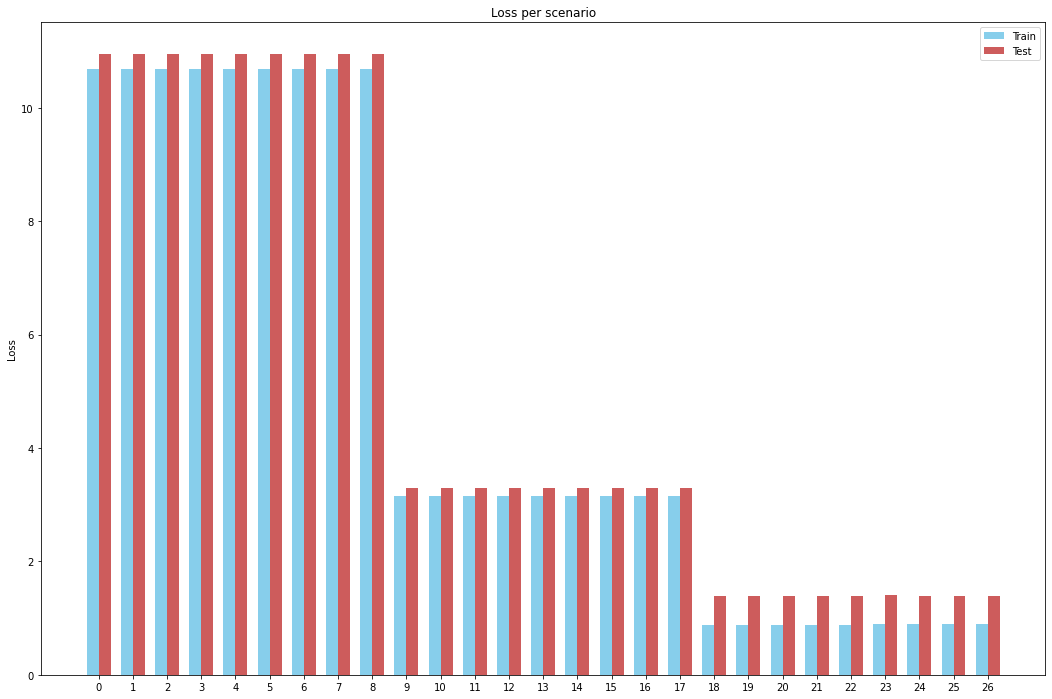

In [73]:
# Comparaison de la MSE d'entrainement et de validation pour chaque modèle
ind = np.arange(len(grid_search.cv_results_['mean_train_score'])) 
width = 0.35
fig, ax = plt.subplots(figsize=(18,12))
rects1 = ax.bar(ind - width/2, -grid_search.cv_results_['mean_train_score'], width,
                color='SkyBlue', label='Train')
rects2 = ax.bar(ind + width/2, -grid_search.cv_results_['mean_test_score'], width, 
                color='IndianRed', label='Test')

ax.set_ylabel('Loss')
ax.set_title('Loss per scenario')
ax.set_xticks(ind)
ax.legend()

#### c. Print the values of the hyperparameters related to the best model (based on the validation score)

In [74]:
grid_search.cv_results_['params'][grid_search.best_index_]

{'max_depth': 8, 'min_samples_split': 6}

In [75]:
Best_Model_DTR=grid_search.best_estimator_
Feat_imp=Best_Model_DTR.feature_importances_
Feat_imp=dict(zip(Train_set_features.columns, Feat_imp))
dict(sorted(Feat_imp.items(), key=lambda item: item[1],reverse=True))

{'bathroom': 0.6877882136373384,
 'educ_sp': 0.09871323490406989,
 'age_sp': 0.09187315770638599,
 'indigenous': 0.052367718369909465,
 'age_hh': 0.04910121081645513,
 'female_hh': 0.010792910226245367,
 'land': 0.004669135621240014,
 'hhsize': 0.003802214265383614,
 'dirtfloor': 0.0004981226111525752,
 'poverty_index': 0.0002728857306186549,
 'hospital_distance': 7.875373897776374e-05,
 'educ_hh': 4.244237222318724e-05}

#### d. Analyse the importance of the variables.

Based on the result above, it shows that important variable is `bathroom` (same result as the linear regressor) and we could set aside variable like `hospital_distantce`, and `educ_hh`  without significant impact on the quality of the predictor

## 5. Using the first 100 observations of the test set

#### plot the real values as well as the predicted values of both models.

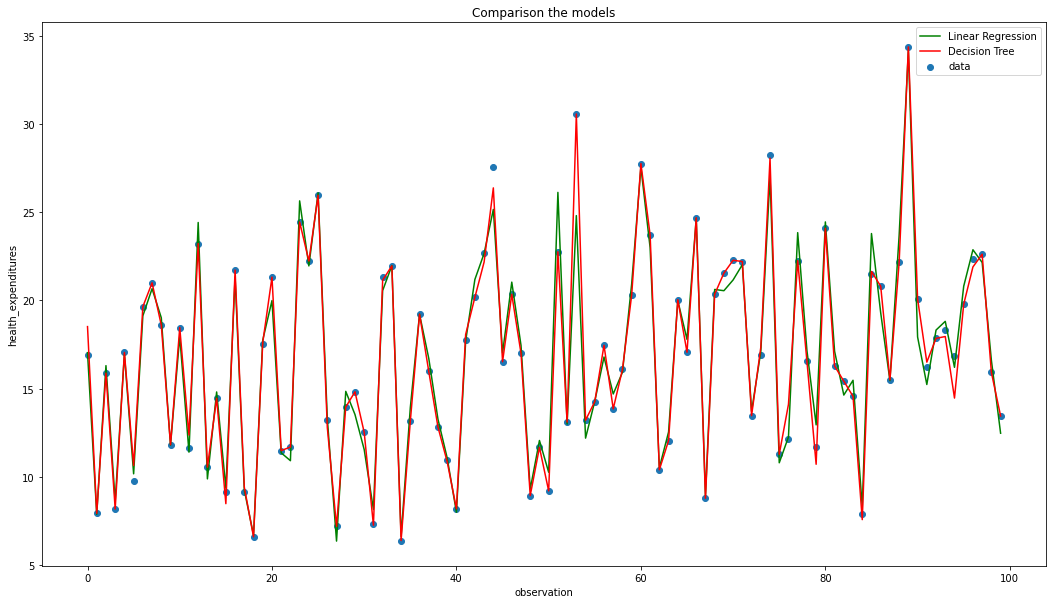

In [76]:
xs = np.arange(100) #using the 100 observations of the test set
y1 = Lin_reg.predict(Test_set_features_transformed[:100])
y2 = DTR.predict(Test_set_features_transformed[:100])

fig, ax = plt.subplots(figsize=(18, 10))
ax.scatter(xs, Test_set_label[:100], label='data')
ax.plot(xs, y1, label='Linear Regression', c="g")
ax.plot(xs, y2, label='Decision Tree', c="r")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Comparison the models')
ax.set_xlabel('observation')
ax.set_ylabel('health_expenditures')
ax.legend()

In [77]:
def rmse(model, X, y):
    
    y_hat = model.predict(X)
    
    return np.sqrt(np.average((y_hat - y.values) ** 2))

# computing the RMSE of the linear model on the whole dataset
err = rmse(Lin_reg, Test_set_features_transformed, Test_set_label)
print("RMSE of linear regression =", err)

# computing the RMSE of the decision tree on the whole dataset
err = rmse(DTR, Test_set_features_transformed, Test_set_label)
print("RMSE of decision tree =", err)

RMSE of linear regression = 1.109591987729479
RMSE of decision tree = 7.914855796031515


In conclusion, the better model is the Linear Regression. Having a better overall score while being much quicker at runtime. 
The RMSE on linear regression is fine (1.073) since it's 1 on the test set. Meanwhile, the decision tree is overfitting since it goes from 0 on train to 7 on test and training, well the cross validation didn't help much the decision tree regressor.